In [176]:
import numpy as np
import pandas as pd
from numpy import *

import warnings
warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #This packet splits the data set into training and testing 
                                                     #dataset with stratified partionong keeping the ratio of both 
                                                     #the dataset constant 

from math import sqrt, ceil

import matplotlib.pyplot as plt
%matplotlib inline   

from copy import copy
import time
import sys
from scipy.io import arff
floatPrecision = sys.float_info.epsilon

##Comment _here_


In [349]:
def WeatherDataExtract():
    dataArray = pd.read_csv("Final_dataset.csv", delimiter=",", header=None)
    Data_Y = dataArray.iloc[0:10190, 3]                    #labels
    Data_X = dataArray.iloc[0:10190, 0:3]                  #features
    # make col 2 values numerical
    #Data_Y = np.where(Data_Y == "RB", 1, -1)
    #print(Data_Y)
    return Data_X, Data_Y

In [362]:
np.random.seed(28031994)
knn = KNeighborsClassifier(n_neighbors=10)

In [363]:
Data_X, Data_Y = WeatherDataExtract()
Xtrain, Xtest, Ttrain, Ttest = train_test_split(Data_X, Data_Y, test_size=0.4)

In [364]:
#standardizing
Xtrain_mean = Xtrain.mean(axis=0)
Xtrain_std = Xtrain.std(axis=0)
temp=Xtrain - Xtrain_mean
Xtrain_standardized = (temp)/Xtrain_std
a = isnan(Xtrain_standardized)
Xtrain_standardized[a] = 0.000000001

Xtest_standardized = (Xtest - Xtrain_mean)/Xtrain_std
a = isnan(Xtest_standardized)
Xtest_standardized[a] = 0.000000001

knn.fit(Xtrain_standardized, Ttrain.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [365]:
Ytrain_KNN = knn.predict(Xtrain_standardized)
Ytest_KNN = knn.predict(Xtest_standardized)
#Ytrain_KNN = Ytrain_KNN.reshape(-1,1)
#Ytest_KNN = Ytest_KNN.reshape(-1,1)
#print(Ytrain_KNN)

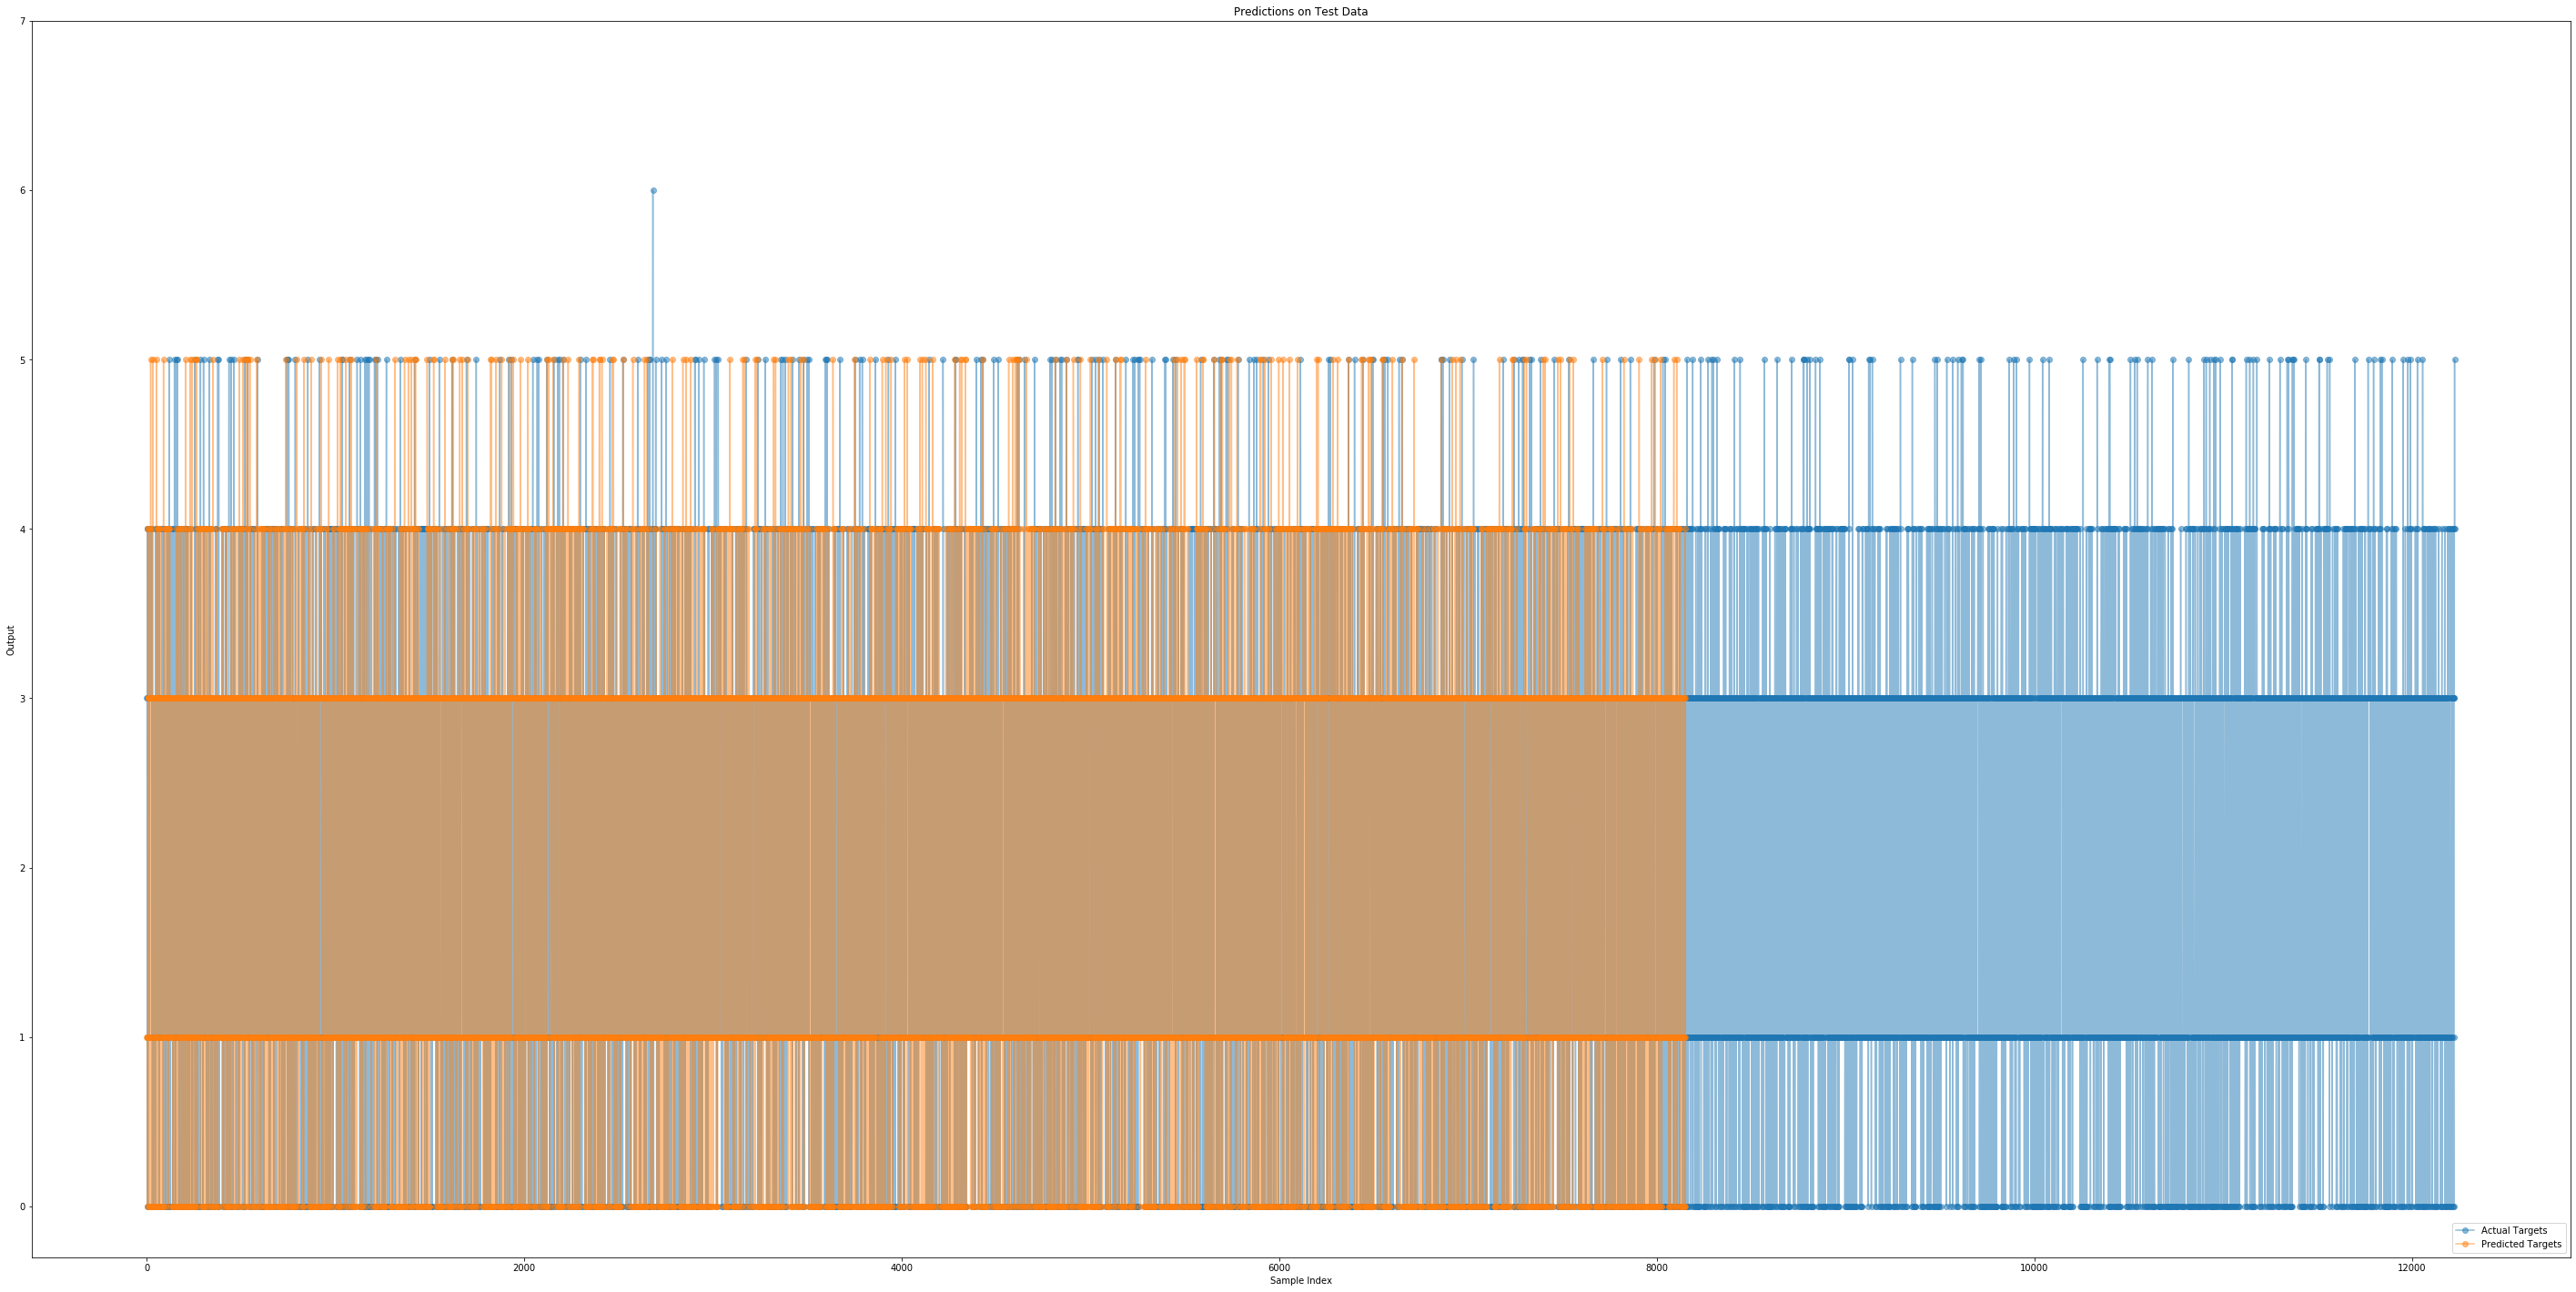

In [366]:

#

plt.figure(figsize=(50, 25))
#plt.subplot(1,2,1)
#plt.hist(np.hstack((Ttrain, Ytrain_KNN)), alpha=0.5)
plt.plot(np.hstack((Ttrain, Ytrain_KNN)), 'o-', alpha=0.5)
'''
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks(np.arange(1, 9, step=1) , ['0','1','2','3','4','5','6','7','8'])
plt.title('Predictions on Training Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')
'''

#plt.subplot(1, 2 ,2)
#plt.hist(np.hstack((Ttest, Ytest_KNN)), alpha=0.5)
plt.plot(np.hstack((Ttest, Ytest_KNN)), 'o-', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.yticks(np.arange(1, 9, step=1) , ['0','1','2','3','4','5','6','7','8'])
plt.title('Predictions on Test Data')
plt.legend(('Actual Targets', 'Predicted Targets'), loc='lower right')


FOG STUFF BELOW

In [157]:
# the common activation functions:

def logistic(x):
    return 1/(1 + np.exp(-x))
def logistic_deriv(x):
    return logistic(x)*(1-logistic(x))

In [158]:
class NeuralNetwork :
    def __init__(self, architecture, activation='logistic') :
        self.architecture = architecture
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_deriv
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'relu':
            self.activation = relu
            self.activation_deriv = relu_deriv
        else :
            raise ValueError('Activation does not match options')
        self.initialize_weights()
    
    def shuffle_set(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
        
    def initialize_weights(self) :
        W = {}
        b = {}
        for l in range(1, len(self.architecture)):
            W[l] = np.random.random((self.architecture[l], self.architecture[l-1]))
            b[l] = np.random.random((self.architecture[l],))
        self.W, self.b = W, b

    def forward(self, x):
        h = {1: x}
        s = {}
        for l in range(1, len(self.W) + 1):
            s[l+1] = self.W[l].dot(h[l]) + self.b[l]
            h[l+1] = self.activation(s[l+1])
        return h, s
        
    def init_delta_values(self):
        delta_W = {}
        delta_b = {}
        for l in range(1, len(self.architecture)):
            delta_W[l] = np.zeros((self.architecture[l], self.architecture[l-1]))
            delta_b[l] = np.zeros((self.architecture[l],))
        return delta_W, delta_b
    
    def calculate_output_layer_entropy(self, y, h_out):
        return -np.sum(y*(np.log(h_out+1e-6)))

    def calculate_output_layer_delta(self, y, h_out, s_out):
        return -(y-h_out) * self.activation_deriv(s_out)
    
    def calculate_output_layer_ce_delta(self, y, h_out, s_out):
        return -(y/(h_out+1e-6)) * self.activation_deriv(s_out)

    def calculate_hidden_delta(self, delta_plus_1, w_l, s_l):
        return np.dot(np.transpose(w_l), delta_plus_1) * self.activation_deriv(s_l)

    def fit(self, X, y, num_iterations=3000, alpha=0.25, weightDecay=0.00, cross_entropy= False, stochastic_gradient=False):
        iterations = 0
        N = len(y)
        avg_cost_func = []
        while iterations < num_iterations :
            if stochastic_gradient:
                X, y = self.shuffle_set(X,y)
            delta_W, delta_b = self.init_delta_values()
            avg_cost = 0
            for i in range(len(y)):
                delta = {}
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                h, s = self.forward(X[i, :])
                # backpropagate the errors
                for l in range(len(self.architecture), 0, -1):
                    if l == len(self.architecture):
                        if cross_entropy:
                            delta[l] = self.calculate_output_layer_ce_delta(y[i,:], h[l], s[l])
                        else:
                            delta[l] = self.calculate_output_layer_delta(y[i,:], h[l], s[l])
                        avg_cost += (np.linalg.norm((y[i,:]-h[l])) / N)
                    else:
                        if l > 1:
                            delta[l] = self.calculate_hidden_delta(delta[l+1], self.W[l], s[l])
                        if stochastic_gradient:
                            delta_W[l] = np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis]))
                            delta_b[l] = delta[l+1]
                            self.W[l] += -alpha * delta_W[l]
                            self.b[l] += -alpha * delta_b[l]
                        else:
                            delta_W[l] += (np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) + (weightDecay*self.W[l]))
                            delta_b[l] += (delta[l+1] + (weightDecay*self.b[l]))
            if not stochastic_gradient:
                # perform the gradient descent step for the weights in each layer
                for l in range(len(self.architecture) - 1, 0, -1):
                    self.W[l] += -alpha * (1.0/N * delta_W[l]) 
                    self.b[l] += -alpha * (1.0/N * delta_b[l])                    
            # complete the average cost calculation
            avg_cost_func.append(avg_cost)
            iterations += 1
        return avg_cost_func

    def predict(self, X):
        N = X.shape[0]
        y = np.zeros((N,))
        for i in range(N):
            h, _ = self.forward(X[i, :])
            y[i] = np.argmax(h[len(self.architecture)])
        return y

    def decision_function(self, X):
        N = X.shape[0]
        scores = np.zeros((N,self.architecture[-1]))
        for i in range(N):
            h, _ = self.forward(X[i, :])
            scores[i]=h[len(self.architecture)]
        return scores


In [166]:
'''def y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    print(len(y))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
        print(i)
        print(y[i])
    return y_vect'''

In [169]:
'''# convert labels to vectors
Ttrain1 = Ttrain1.astype(int)
Ttest1 = Ttest1.astype(int)
y_vec_train = y_to_vect(Ttrain1)
y_vec_test = y_to_vect(Ttest1)'''

'# convert labels to vectors\nTtrain1 = Ttrain1.astype(int)\nTtest1 = Ttest1.astype(int)\ny_vec_train = y_to_vect(Ttrain1)\ny_vec_test = y_to_vect(Ttest1)'

In [147]:
# hidden units for single layer
hn=[1,10,20,30,50,100]
accuracy_train=[]
accuracy_test=[]
for i in hn:
    architecture = [784,i,10]
    network = NeuralNetwork(architecture, 'logistic')
    cost_function = network.fit(Xtrain, Ttrain, 1000)
    train_predict = network.predict(Xtrain)
    accuracy_train.append(accuracy_score(Ttrain, train_predict) * 100)
    test_predict = network.predict(Xtest)
    accuracy_test.append(accuracy_score(Ttest, test_predict) * 100)

TypeError: '(0, slice(None, None, None))' is an invalid key

In [ ]:
# architecture
architecture = [784, 20, 10]
network = NeuralNetwork(architecture, 'logistic')
epochs = [100,500,1000,1500,2000,2500]
accuracy_train=[]
accuracy_test=[]
for i in epochs:
    cost_function = network.fit(x_train, y_vec_train, i)
    train_predict = network.predict(x_train)
    accuracy_train.append(accuracy_score(y_train, train_predict) * 100)
    test_predict = network.predict(x_test)
    accuracy_test.append(accuracy_score(y_test, test_predict) * 100)

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(epochs,accuracy_train,label='Training Accuracy')
plt.plot(epochs,accuracy_test,label='Test Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()